## Simple Python Analog
This is just a simple comparison to the example shown in R.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [2]:
# Import
df = pd.read_csv('data/UNRATENSA.csv', index_col='DATE')
df.index = pd.to_datetime(df.index)
ts = df.UNRATENSA.resample('M').max()
ts.head()

DATE
1948-01-31    4.0
1948-02-29    4.7
1948-03-31    4.5
1948-04-30    4.0
1948-05-31    3.4
Freq: M, Name: UNRATENSA, dtype: float64

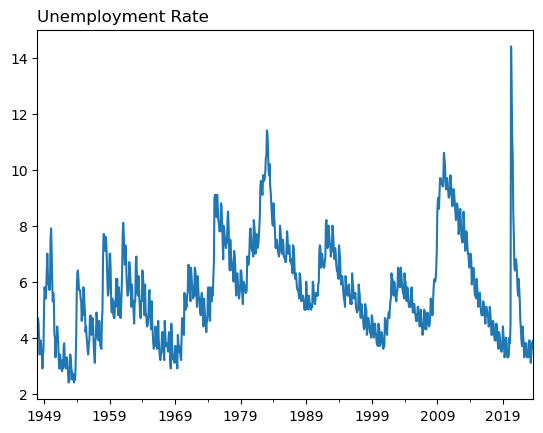

In [3]:
ts.plot()
plt.title('Unemployment Rate', loc='left')
plt.xlabel('')
plt.show()

In [4]:
# isolating pre-COVID for training the model
training = ts[ts.index.year < 2020]

In [5]:
# simple seasonal ETS model
ets_model = ETSModel(training, seasonal='add')
ets_model = ets_model.fit()
ets_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:              UNRATENSA   No. Observations:                  864
Model:                       ETS(ANA)   Log Likelihood                 -20.999
Date:                Wed, 31 Jan 2024   AIC                             73.998
Time:                        07:19:06   BIC                            150.183
Sample:                    01-31-1948   HQIC                           103.158
                         - 12-31-2019   Scale                            0.061
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9156      0.029     31.395      0.000       0.858       0.973
smoothing_seasonal      0.0844      0.014      5.888      0.000       0.056       0.113
initial_level           4.0000        nan        nan        nan         nan         nan
initial_seasonal.0     -0.9731        nan        nan        nan         nan         nan
initial_seasonal.1     -1.0631        nan        nan        nan         nan         nan
initial_seasonal.2     -1.3008        nan        nan        nan         nan         nan
initial_seasonal.3     -0.9578        nan        nan        nan         nan         nan
initial_seasonal.4     -0.6890        nan        nan        nan         nan         nan
initial_seasonal.5     -0.2137        nan        nan        nan         nan         nan
initial_seasonal.6     -0.1006        nan        nan        nan         nan         nan
initial_seasonal.7     -0.6175        nan        nan        nan         nan         nan
initial_seasonal.8     -0.4943        nan        nan        nan         nan         nan
initial_seasonal.9     -0.0877        nan        nan        nan         nan         nan
initial_seasonal.10     0.2138        nan        nan        nan         nan         nan
initial_seasonal.11          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                      180.20   Jarque-Bera (JB):               147.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

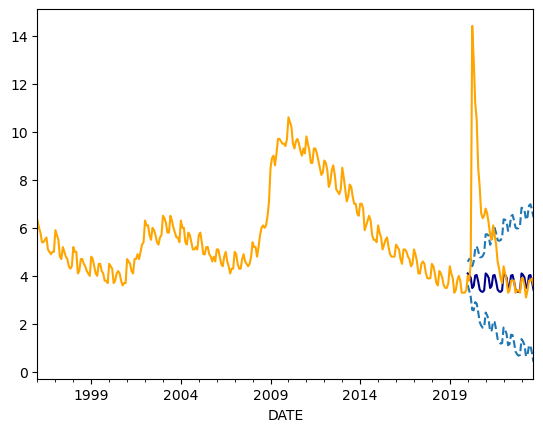

In [6]:
simple_forecasts = ets_model.get_prediction(start='2020-01-01', end='2023-09-30').summary_frame()

simple_forecasts["mean"].plot(color='darkblue')
simple_forecasts["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
simple_forecasts["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
ts[ts.index.year>1995].plot(color='orange')
plt.show()